# Prática 1

## Modelos Lineares

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

## Exercício: dados Prestige

Fontes:
- https://rstudio-pubs-static.s3.amazonaws.com/63531_55f83f76f1104efd9b6d694f9228d55e.html
- Estatística para Ciência de Dados. Notas de aula da Profa. Mariana Cúri.

O arquivo Prestige.csv contém 102 observações e 7 variáveis. A descrição das variáveis no conjunto de dados é a seguinte:

- **occupation**: profissão
- **education**: número médio de anos de estudo dos titulares da profissão.
- **income**: A renda média dos ocupantes ocupacionais, em dólares.
- **women**: a porcentagem de mulheres na ocupação.
- **prestige**: a classificação média de prestígio para a ocupação.
- **census**: o código da ocupação utilizado na pesquisa.
- **type**: profissional e gerencial (prof), colarinho branco (wc), colarinho azul (bc) ou ausente (NA) (Fox e Weisberg 2011)

Ajuste um modelo de regressão linear múltiplo para compreender a associação entre o prestígio e as preditoras renda, educação e mulheres. Verifique se o modelo é adequado.

teste

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Dados Prestige - Leitura dos dados a partir de uma pasta local
#pkgdir = '/hdd/MBA/ECD/Data'
#dados = pd.read_csv(f'{pkgdir}/Prestige.csv', sep = ',', na_values = '-', encoding= 'unicode_escape')

# Leitura dos dados direto do github
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Estatistica-Ciencia-Dados/main/Data/Prestige.csv', sep = ',', na_values = '-', encoding= 'unicode_escape')

dados.head()

,occupation,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


In [2]:
dados.describe()

,education,income,women,prestige,census
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333,5401.774510
std,2.728444,4245.922227,31.724931,17.204486,2644.993215
min,6.380000,611.000000,0.000000,14.800000,1113.000000
25%,8.445000,4106.000000,3.592500,35.225000,3120.500000
50%,10.540000,5930.500000,13.600000,43.600000,5135.000000
75%,12.647500,8187.250000,52.202500,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


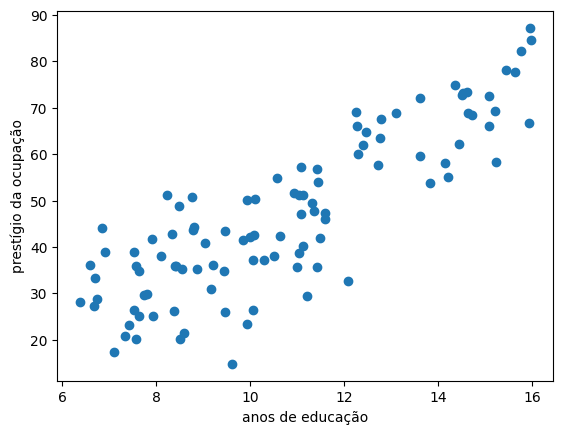

In [3]:
# Constrói os gráficos de dispersão

plt.scatter(x=dados.education,y=dados.prestige)
plt.xlabel("anos de educação")
plt.ylabel("prestígio da ocupação")
plt.show()

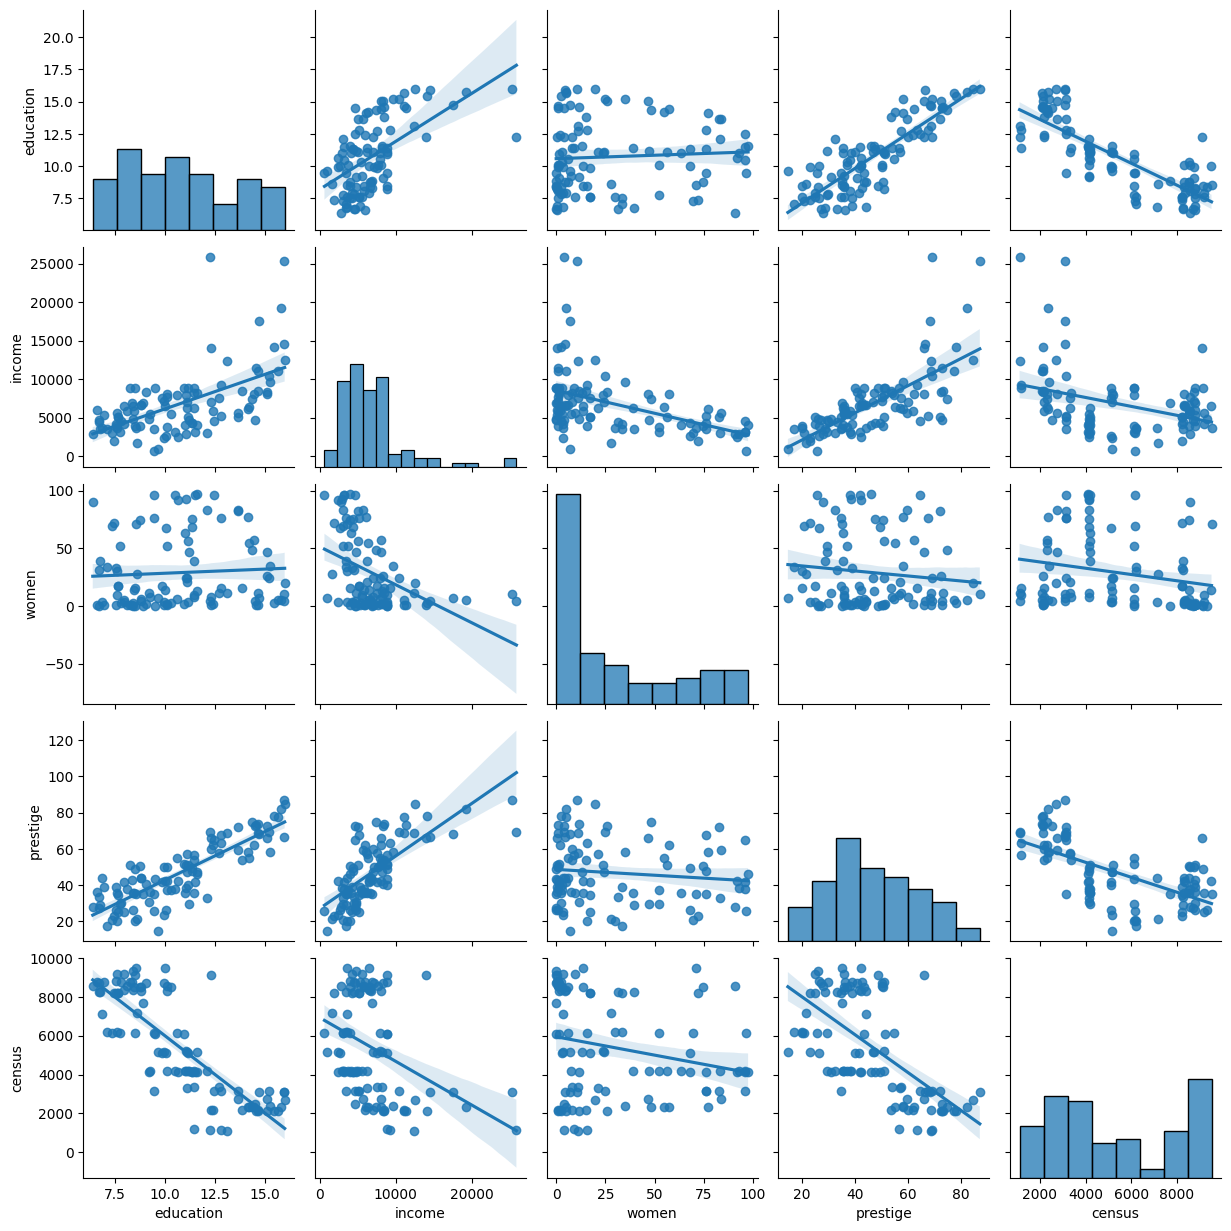

In [4]:
import seaborn as sns


dados1 = dados[["education","income","women","prestige","type"]]

sns.pairplot(dados, kind='reg')


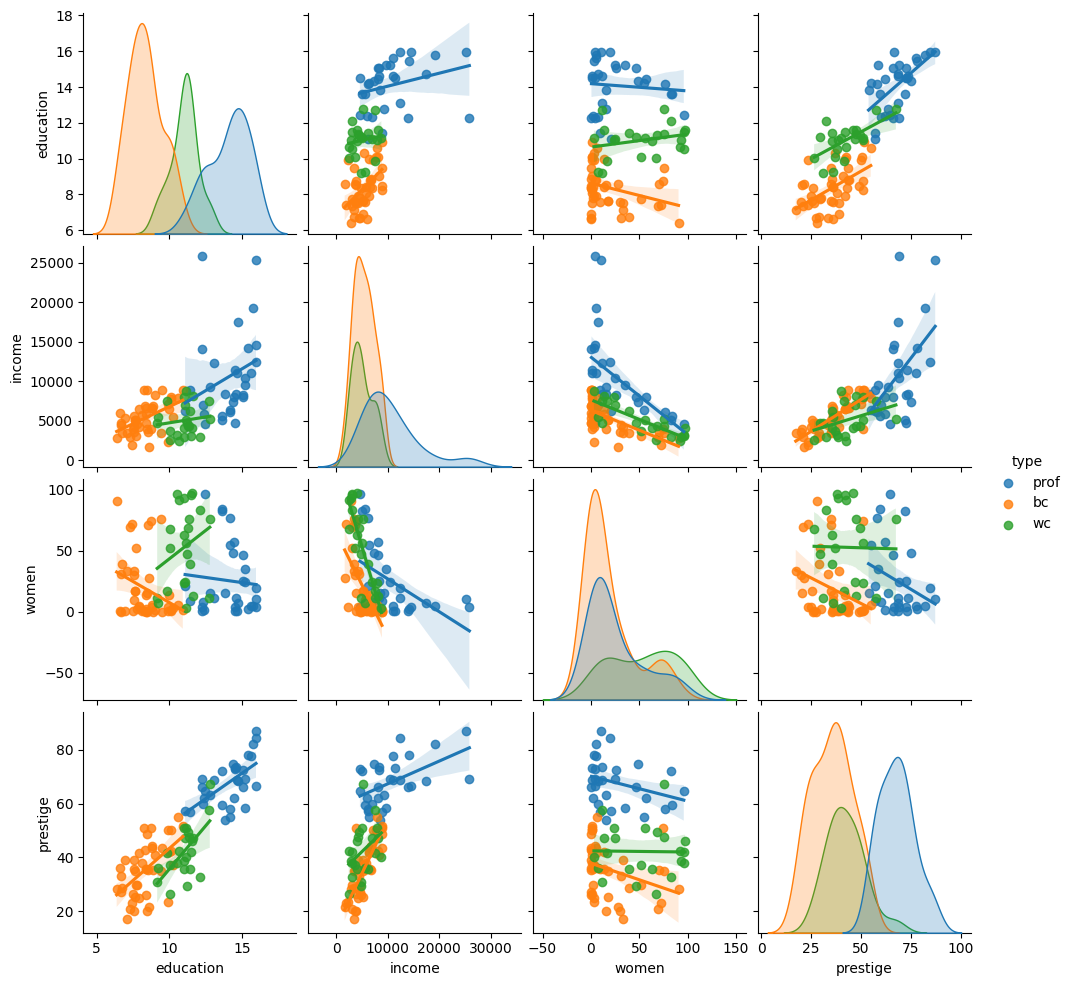

In [5]:

# Outra maneira, diferenciando por "type"

sns.pairplot(dados1, hue='type', kind='reg')


Text(0.5, 1.0, 'Matriz de correlações de Pearson')

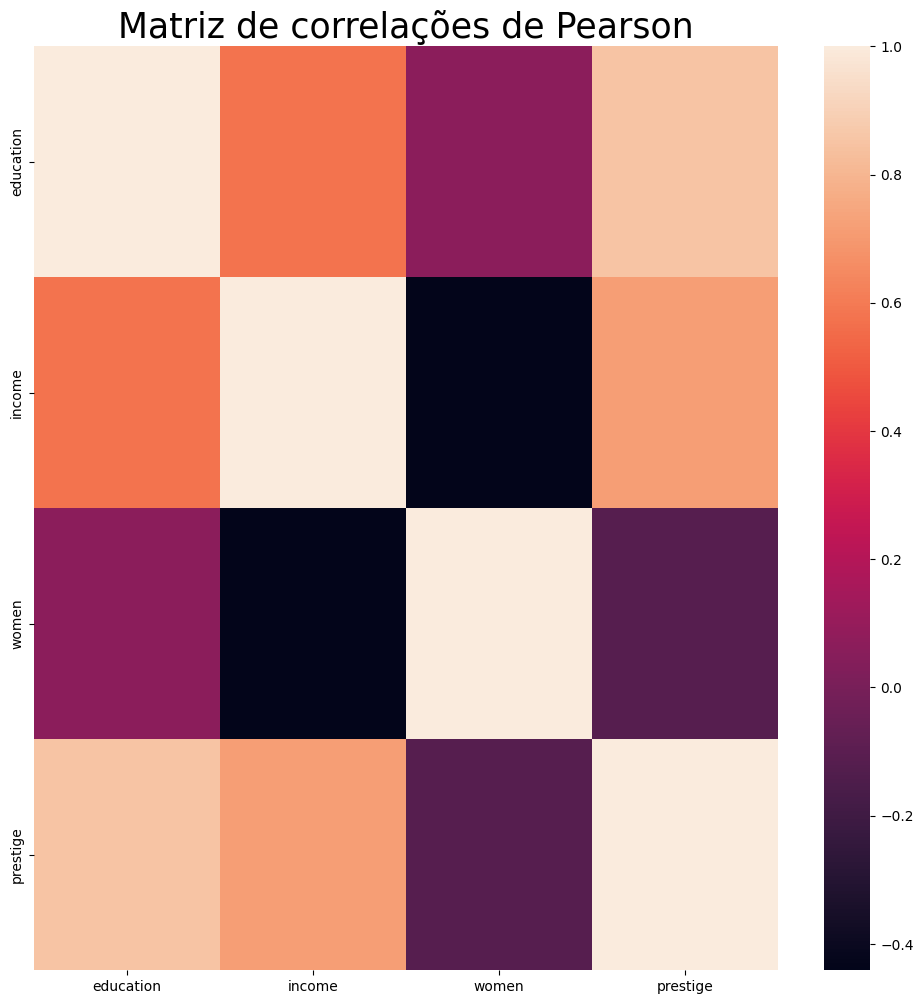

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dados1.drop('type',axis=1).corr())

plt.title('Matriz de correlações de Pearson',fontsize=25)


In [7]:
from statsmodels.formula.api import ols

#Ajusta o modelo de regressão linear múltipla com Prestige como variável resposta
mod = ols('dados.prestige ~ dados.income + dados.education + dados.women',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         dados.prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Tue, 21 May 2024   Prob (F-statistic):           6.26e-34
Time:                        12:36:52   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.7943      3.239     

In [8]:
# Estimativa da variância do erro (sigma2), que é o MSE=SQE/(n-p)
res.mse_resid

61.56704276635242

In [9]:
# valores preditos de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance





Elabora os gráficos de todos os resíduos

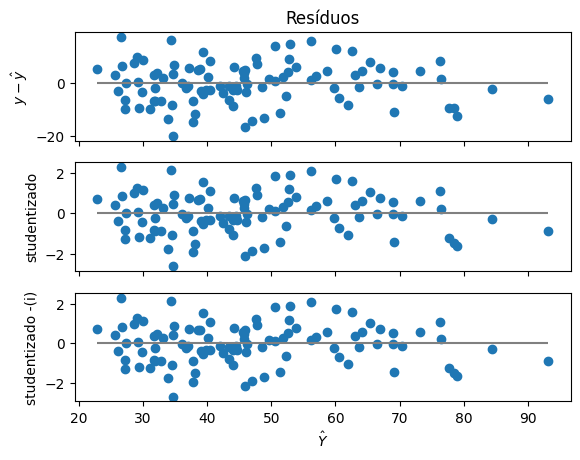

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

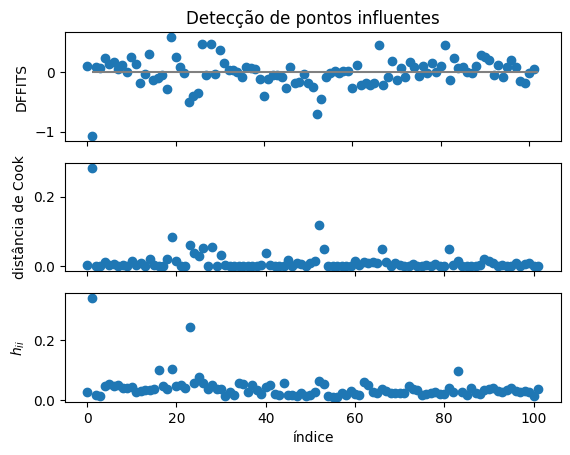

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(dados.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
ax1.hlines(0,xmin=1,xmax=102,color='gray')
ax2.scatter(dados.index, cook)
ax2.set_ylabel('distância de Cook')
ax3.scatter(dados.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

**Identificando a observações que se destacam das demais em alguns gráficos de diagnóstico**

In [12]:
# Instale a plotly se necessário
#!pip install plotly

import plotly.express as px

fig = px.scatter(x = dados.index, y=cook)
fig.show()

Identificadas as observações 1 e, em menor escala, a 52. Verifique o que elas tem de especial.

In [13]:
# x and y given as DataFrame columns
import plotly.express as px

fig = px.scatter(x = dados.index, y=hii)
fig.show()

Identificadas as observações 1 e 23. Verifique o que elas tem de especial.

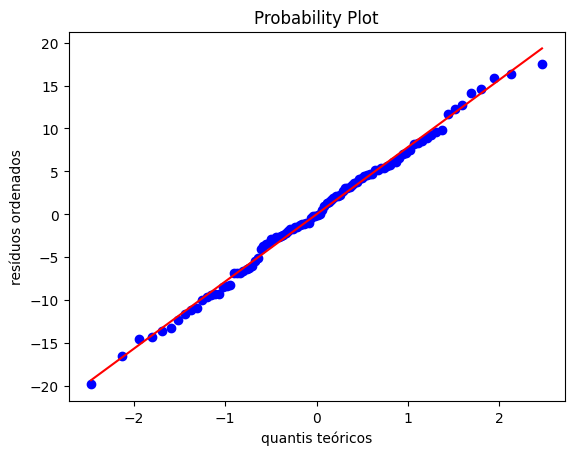

In [14]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

In [15]:
# Os autores em https://rstudio-pubs-static.s3.amazonaws.com/63531_55f83f76f1104efd9b6d694f9228d55e.html
# sugerem a transformação logaritmica da variável income e verificamos se type deve ser adicionada

# Modelo de regressão com a variável "income" transformada

l_income = np.log2(dados.income) # base 2
le_income = np.log(dados.income) # base e

mod = ols('dados.prestige ~ l_income + dados.education + dados.women',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         dados.prestige   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     165.4
Date:                Tue, 21 May 2024   Prob (F-statistic):           3.21e-38
Time:                        12:36:55   Log-Likelihood:                -342.51
No. Observations:                 102   AIC:                             693.0
Df Residuals:                      98   BIC:                             703.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -110.9658     14.843     

In [16]:
# Modelo de regressão com a variável "income" transformada e variável type

mod = ols('dados.prestige ~ l_income+dados.education+dados.women+dados.type',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         dados.prestige   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     118.3
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.71e-38
Time:                        12:36:55   Log-Likelihood:                -318.49
No. Observations:                  98   AIC:                             649.0
Df Residuals:                      92   BIC:                             664.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -115.6722     18

In [17]:
# Modelo de regressão final?
# Vamos exlcuir type com base no alto valor p, mas ela pode ser incluída em interação com income, veja a próxima célula
# Que outros critérios você utilizaria para a seleção de variáveis?


mod = ols('dados.prestige ~ l_income+dados.education',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         dados.prestige   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 21 May 2024   Prob (F-statistic):           6.11e-39
Time:                        12:36:55   Log-Likelihood:                -343.78
No. Observations:                 102   AIC:                             693.6
Df Residuals:                      99   BIC:                             701.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -95.1940     10.998     

In [18]:
# Análise extra: inclusão de interação de variáveis
# Modelo de regressão com interação


mod = ols('dados.prestige ~ dados.type*(dados.income)',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         dados.prestige   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     88.94
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.08e-33
Time:                        12:36:55   Log-Likelihood:                -330.34
No. Observations:                  98   AIC:                             672.7
Df Residuals:                      92   BIC:                             688.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

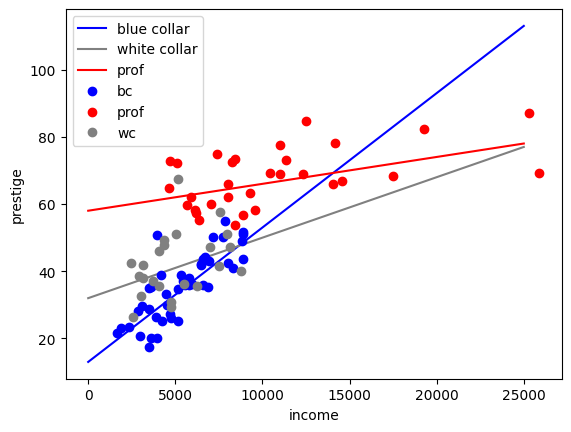

In [19]:
import itertools

##### Entendendo o que é a interação
# Veja que as retas de regressão são bastante diferentes para diferentes types

x = np.linspace(0,25000)
y1 = 13 + 0.004*x # blue collar
y2 =(13+18.98) + (0.004-0.0022)*x # white collar
y3 = (13+45) + (0.004-0.0032)*x    # prof

plt.plot(x, y1, label="blue collar", color="blue")
plt.plot(x, y2, label="white collar", color="gray")
plt.plot(x, y3, label="prof",color="red")
colors = itertools.cycle(["b", "r", "gray"])
groups = dados.groupby("type")
for name, group in groups:
    plt.plot(group["income"], group["prestige"], marker="o", linestyle="", label=name, color=next(colors))
plt.legend()
plt.xlabel("income")
plt.ylabel("prestige")
plt.show()